# Train OCR text Detector quick example

In [1]:
import os
import sys
import torch
import warnings
from matplotlib import pyplot as plt
from datetime import datetime
warnings.filterwarnings('ignore')

# change this property
NOMEROFF_NET_DIR = os.path.abspath('../../../../')
sys.path.append(NOMEROFF_NET_DIR)

from nomeroff_net.text_detectors.base.ocr import OCR

In [2]:
plt.rcParams["figure.figsize"] = (10, 10)

In [3]:
%matplotlib inline 

In [4]:
# auto download latest dataset
from nomeroff_net.tools import modelhub

# # auto download latest dataset
# info = modelhub.download_dataset_for_model("Ru")
# PATH_TO_DATASET = info["dataset_path"]

# local path dataset
PATH_TO_DATASET = os.path.join(NOMEROFF_NET_DIR, "./data/dataset/TextDetector/ocr_example")

In [5]:
PATH_TO_DATASET

'/mnt/storage2/var/www/nomeroff-net.24/nomeroff_net/tools/../../data/./dataset/TextDetector/Ru/autoriaNumberplateOcrRu-2021-09-01'

In [6]:
DATASET_NAME = "ru"
VERSION = f"{datetime.now().strftime('%Y_%m_%d')}_pytorch_lightning"

RESULT_MODEL_PATH = os.path.join(NOMEROFF_NET_DIR, 
                                 "models/", 
                                 'anpr_ocr_{}_{}.ckpt'.format(DATASET_NAME, VERSION))

In [7]:
RESULT_MODEL_PATH

'/mnt/storage2/var/www/nomeroff-net.24/models/anpr_ocr_ru_2021_09_01_pytorch_lightning.ckpt'

In [8]:
class ru(OCR):
    def __init__(self):
        OCR.__init__(self)
        # only for usage model
        # in train generate automaticly
        self.letters = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "A", "B", "C", "E", "H", "K", "M", "O",
                        "P", "T", "X", "Y"]

        # Train hyperparameters
        self.batch_size = 4
        self.epochs = 5
        self.gpus = torch.cuda.device_count()

In [9]:
ocrTextDetector = ru()
model = ocrTextDetector.prepare(PATH_TO_DATASET, use_aug=False, num_workers=1)

GET ALPHABET
Max plate length in "val": 9
Max plate length in "train": 9
Max plate length in "test": 9
Letters train  {'1', 'H', 'M', 'O', 'T', '5', '9', 'C', '3', 'B', '2', 'E', 'K', 'Y', 'P', '4', '6', 'X', 'A', '0', '7', '8'}
Letters val  {'1', 'H', 'M', 'O', 'T', '5', '9', 'C', '3', 'B', '2', 'E', 'K', 'Y', 'P', '4', '6', 'X', 'A', '0', '7', '8'}
Letters test  {'H', '1', 'M', 'O', 'T', '5', '9', 'C', '3', 'B', '2', 'E', 'K', 'Y', 'P', '4', '6', 'X', 'A', '0', '7', '8'}
Max plate length in train, test and val do match
Letters in train, val and test do match
Letters: 0 1 2 3 4 5 6 7 8 9 A B C E H K M O P T X Y

EXPLAIN DATA TRANSFORMATIONS
START BUILD DATA
DATA PREPARED


In [10]:
#ocrTextDetector.load(RESULT_MODEL_PATH)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type       | Params
---------------------------------------
0 | resnet  | Sequential | 2.8 M 
1 | cnn     | BlockCNN   | 590 K 
2 | linear1 | Linear     | 524 K 
3 | gru1    | BlockRNN   | 139 K 
4 | gru2    | BlockRNN   | 16.9 K
5 | linear2 | Linear     | 1.5 K 
---------------------------------------
4.1 M     Trainable params
0         Non-trainable params
4.1 M     Total params
16.225    Total estimated model params size (MB)


Restoring states from the checkpoint file at /mnt/storage2/var/www/nomeroff-net.24/train/lr_find_temp_model.ckpt
Restored all states from the checkpoint file at /mnt/storage2/var/www/nomeroff-net.24/train/lr_find_temp_model.ckpt


Found lr: 0.12589254117941648



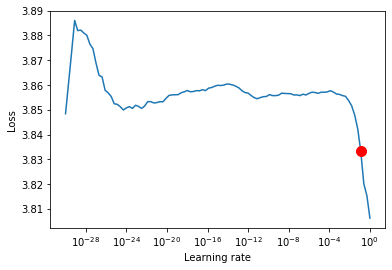

In [11]:
# # tune
# lr_finder = ocrTextDetector.tune()
#
# # Plot with
# fig = lr_finder.plot(suggest=True)
# fig.show()

In [12]:
ocrTextDetector.train()

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.9/site-packages/pytorch_lightning/core/datamodule.py:423: LightningDeprecationWarning: DataModule.setup has already been called, so it will not be called again. In v1.6 this behavior will change to always call DataModule.setup.
  rank_zero_deprecation(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


/usr/local/lib/python3.9/site-packages/pytorch_lightning/core/datamodule.py:423: LightningDeprecationWarning: DataModule.teardown has already been called, so it will not be called again. In v1.6 this behavior will change to always call DataModule.teardown.
  rank_zero_deprecation(
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]



[INFO] best model path /mnt/storage2/var/www/nomeroff-net.24/nomeroff_net/data/logs/ocr/epoch=22-step=8877.ckpt


--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_loss': 0.0161697119474411}
--------------------------------------------------------------------------------



NPOcrNet(
  (resnet): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

In [13]:
ocrTextDetector.save(RESULT_MODEL_PATH)

model save to /mnt/storage2/var/www/nomeroff-net.24/models/anpr_ocr_ru_2021_09_01_pytorch_lightning.ckpt


In [14]:
ocrTextDetector.load(RESULT_MODEL_PATH)

NPOcrNet(
  (resnet): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)

In [19]:
ocrTextDetector.test_acc(verbose=True)
#ocrTextDetector.val_acc(verbose=False)
#ocrTextDetector.train_acc(verbose=False)


[INFO] /mnt/storage2/var/www/nomeroff-net.24/nomeroff_net/tools/../../data/./dataset/TextDetector/Ru/autoriaNumberplateOcrRu-2021-09-01/test/img/A926AA113.png
Predicted: a926aa13 			 True: a926aa113

[INFO] /mnt/storage2/var/www/nomeroff-net.24/nomeroff_net/tools/../../data/./dataset/TextDetector/Ru/autoriaNumberplateOcrRu-2021-09-01/test/img/E666PP123.png
Predicted: e66p123 			 True: e666pp123

[INFO] /mnt/storage2/var/www/nomeroff-net.24/nomeroff_net/tools/../../data/./dataset/TextDetector/Ru/autoriaNumberplateOcrRu-2021-09-01/test/img/E499KP198.png
Predicted: o8499kp198 			 True: e499kp198

[INFO] /mnt/storage2/var/www/nomeroff-net.24/nomeroff_net/tools/../../data/./dataset/TextDetector/Ru/autoriaNumberplateOcrRu-2021-09-01/test/img/T962PP777.png
Predicted: t962p777 			 True: t962pp777

[INFO] /mnt/storage2/var/www/nomeroff-net.24/nomeroff_net/tools/../../data/./dataset/TextDetector/Ru/autoriaNumberplateOcrRu-2021-09-01/test/img/E935HH78.png
Predicted: e93bhh78 			 True: e935hh78



0.9894551845342706

## than train with augumentation

In [10]:
for i in range(0,1):
    # Train next 2 epochs on augumentated dataset
    ocrTextDetector.epochs += 2

    # prepare with augumentation
    ocrTextDetector.prepare(PATH_TO_DATASET, use_aug=True, num_workers=1, seed=i)

    # Plot with
    #fig = lr_finder.plot(suggest=True)
    #fig.show()
    model = ocrTextDetector.train(seed=i, ckpt_path=RESULT_MODEL_PATH)
    ocrTextDetector.test_acc(verbose=False)
    ocrTextDetector.save(RESULT_MODEL_PATH)